# BIKES STORE SALES ANALYSIS
### *DATASET SOURCE: https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe*

#### Proyecto de práctica de análisis de datos referido a tienda ficticia de bicicletas y artículos relacionados.

#### DATASET SOURCE: https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

##### El proyecto fue realizado de manera autodidacta y consta de diferentes etapas que reflejan lo aprendido en cursos, 
##### video tutoriales, documentación específica de las librerías utilizadas y artículos de internet, entre otros.

### IMPORT LIBRARIES

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATA

In [266]:
mainpath= "/Users/ezequielpolacco/Desktop/Data Science/Kaggle"
filename= "/Bikes sales data/Bikes sales data.csv"
fullpath= mainpath + "/" + filename

In [267]:
sales = pd.read_csv(fullpath)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### DATA PREPROCESSING

### ORDENAR POR FECHA

In [538]:
sales.sort_values(["Date"], ascending=True)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
58729,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Cleaners,Bike Wash - Dissolver,5,3,8,24,15,39
23363,2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Fenders,Fender Set - Mountain,19,8,22,258,152,410
19225,2016-07-31,31,July,2016,48,Adults (35-64),F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9,26,112,138
94147,2016-07-31,31,July,2016,51,Adults (35-64),M,Germany,Saarland,Accessories,Tires and Tubes,ML Mountain Tire,6,11,30,82,66,148


In [539]:
# Como DATE es un tipo objeto, lo convierto a tipo datetime de la siguiente manera:
sales["Date"]= sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales["Date"]=pd.to_datetime(sales['Date'])
sales["Date"].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Date, dtype: datetime64[ns]

In [540]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [541]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### COMPRUEBO PRESENCIA DE VALORES NULOS EN EL DATASET

In [542]:
sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [543]:
sales.shape

(113036, 18)

### ANÁLISIS RELACIONADOS CON FECHAS

### CUÁLES SON LOS AÑOS CON MÁS VENTAS?

In [278]:
sales["Year"].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2011     2677
2012     2677
Name: Year, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

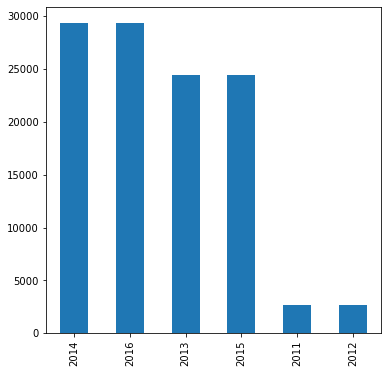

In [279]:
sales["Year"].value_counts().plot(kind = "bar", figsize = (6, 6))
plt.legend

### CUÁLES SON LOS MESES CON MÁS VENTAS?

In [281]:
sales["Month"].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

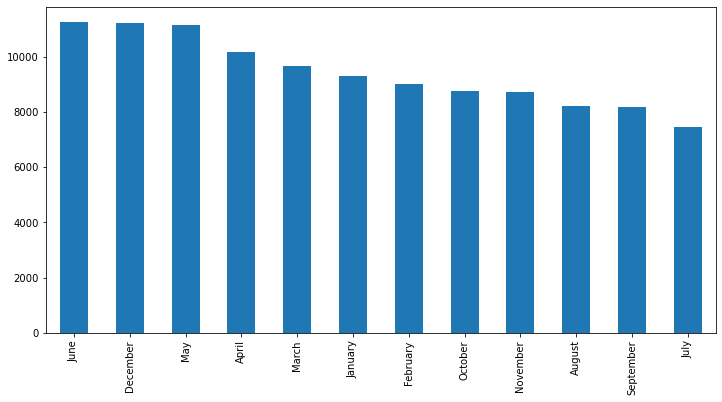

In [282]:
sales["Month"].value_counts().plot(kind = "bar", figsize = (12, 6))

### ANÁLISIS RELACIONADOS CON EDAD Y GÉNERO

### CUÁL ES LA EDAD PROMEDIO DE LOS CLIENTES?

In [287]:
round(sales["Customer_Age"].mean())

36

### CUÁNTOS CLIENTES SON HOMBRES Y CUÁNTOS MUJERES

In [289]:
gender_male = sales["Customer_Gender"] == "M"
gender_male = gender_male.sum()
gender_male

58312

In [290]:
gender_female = sales["Customer_Gender"] == "F"
gender_female = gender_female.sum()
gender_female

54724

In [291]:
gender_total = gender_male + gender_female
gender_total

113036

### PROPORCIÓN DE HOMBRES

In [293]:
prop_male = gender_male / gender_total
prop_male.round(3)*100

51.6

In [294]:
prop_female = gender_female / gender_total
prop_female.round(3)*100

48.4

<function matplotlib.pyplot.legend(*args, **kwargs)>

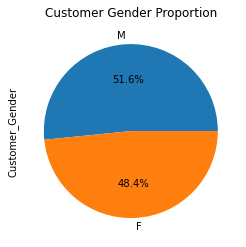

In [295]:
sales["Customer_Gender"].value_counts().plot(kind= "pie", autopct='%1.1f%%')
plt.title("Customer Gender Proportion")
plt.legend

### EDAD PROMEDIO DE MUJERES Y HOMBRES

In [297]:
sales.groupby("Customer_Gender").Customer_Age.mean()

Customer_Gender
F    36.168993
M    35.684799
Name: Customer_Age, dtype: float64

### CUÁL ES LA EDAD MÁS ALTA EN MUJERES Y HOMBRES

In [299]:
sales.groupby("Customer_Gender").Customer_Age.max()

Customer_Gender
F    87
M    86
Name: Customer_Age, dtype: int64

### CUÁL ES LA EDAD MÁS BAJA EN MUJERES Y HOMBRES

In [352]:
print("Cuál es la edad más baja en mujeres y hombres?")
print(sales.groupby("Customer_Gender").Customer_Age.min())

Cuál es la edad más baja en mujeres y hombres?
Customer_Gender
F    17
M    17
Name: Customer_Age, dtype: int64


### EDAD DE ACUERDO AL GÉNERO 

<function matplotlib.pyplot.legend(*args, **kwargs)>

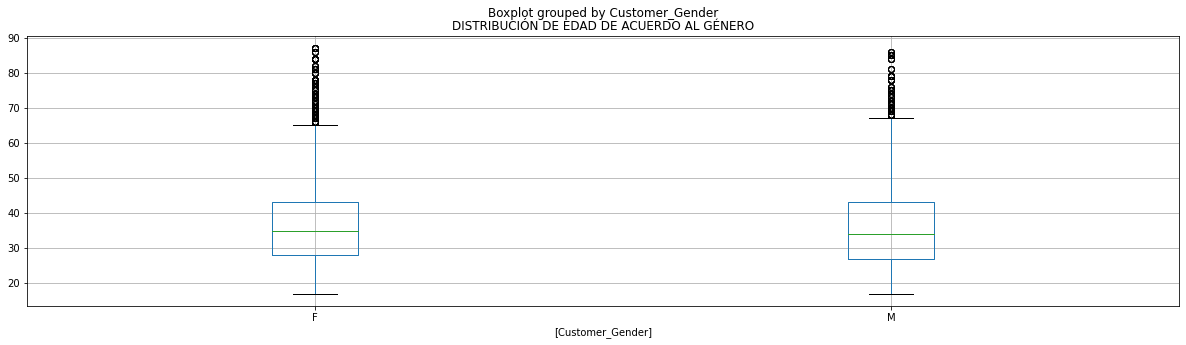

In [670]:
sales[["Customer_Gender", "Customer_Age"]].boxplot(by="Customer_Gender", figsize=(20,5))
plt.title("DISTRIBUCIÓN DE EDAD DE ACUERDO AL GÉNERO")
plt.legend

### EDAD DE ACUERDO AL PAÍS 

<function matplotlib.pyplot.legend(*args, **kwargs)>

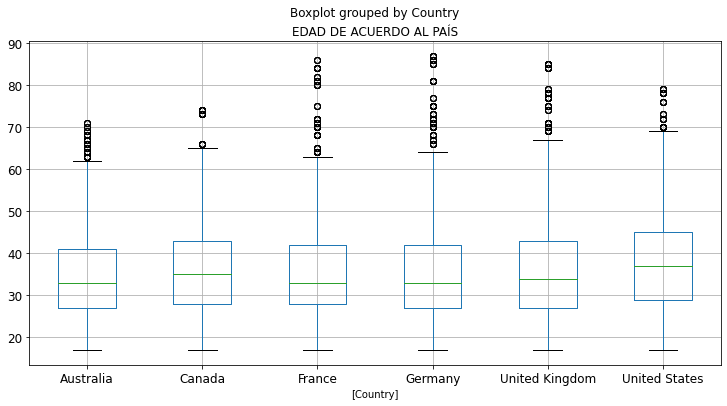

In [671]:
sales[["Customer_Age", "Country"]].boxplot(by="Country", figsize=(12,6), fontsize=12)
plt.title("EDAD DE ACUERDO AL PAÍS")
plt.legend

### CUÁNTAS VENTAS SE CORRESPONDEN POR CADA GRUPO ETARIO?

In [545]:
 sales["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

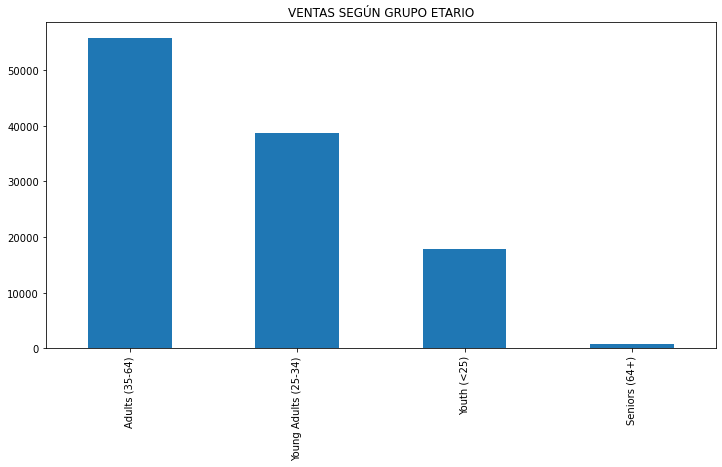

In [673]:
sales["Age_Group"].value_counts().plot(kind = "bar", figsize=(12,6))
plt.title("VENTAS SEGÚN GRUPO ETARIO")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

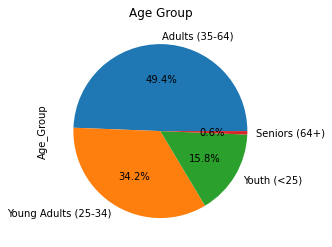

In [305]:
sales["Age_Group"].value_counts().plot(kind = "pie", autopct = '%1.1f%%')
plt.title("Age Group")
plt.legend

### CUÁLES SON INGRESOS POR GRUPO ETARIO? 

In [370]:
sales.groupby("Age_Group").Revenue.mean()

Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64

### GRÁFICO DE DISPERSIÓN: RELACIÓN ENTRE EDAD E INGRESO

<function matplotlib.pyplot.legend(*args, **kwargs)>

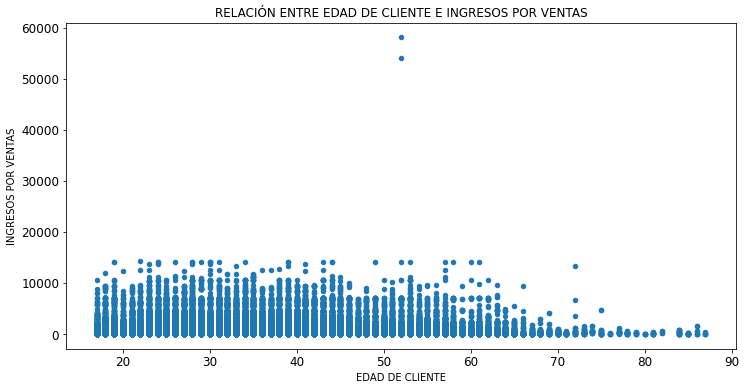

In [704]:
sales.plot(kind="scatter", x = "Customer_Age", y = "Revenue", figsize=(12,6), fontsize=12)
plt.xlabel("EDAD DE CLIENTE")
plt.ylabel("INGRESOS POR VENTAS")
plt.title("RELACIÓN ENTRE EDAD DE CLIENTE E INGRESOS POR VENTAS")
plt.legend

### CUÁL ES LA GANANCIA POR GRUPO ETARIO EN AUSTRALIA? 

In [382]:
sales.loc[(sales['Country'] == 'Australia') & (sales['Age_Group'] == 'Adults (35-64)'), "Revenue"].sum()

9300875

In [383]:
sales.loc[(sales['Country'] == 'Australia') & (sales['Age_Group'] == 'Young Adults (25-34)'), "Revenue"].sum()

7919296

In [384]:
sales.loc[(sales['Country'] == 'Australia') & (sales['Age_Group'] == 'Youth (<25)'), "Revenue"].sum()

4026837

In [385]:
sales.loc[(sales['Country'] == 'Australia') & (sales['Age_Group'] == 'Seniors (64+)'), "Revenue"].sum()

55051

### CUÁL ES EL PRODUCTO MÁS ELEGIDO POR RANGO ETARIO?

### ANÁLISIS RELACIONADOS CON DESTINOS DE VENTAS

### CUÁLES SON LOS DESTINOS DE LAS VENTAS?

In [307]:
sales["Country"].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

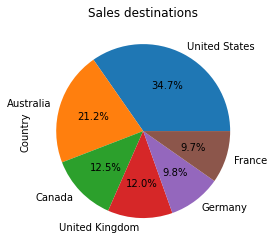

In [308]:
sales["Country"].value_counts().plot(kind= "pie", autopct = '%1.1f%%')
plt.title("Sales destinations")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

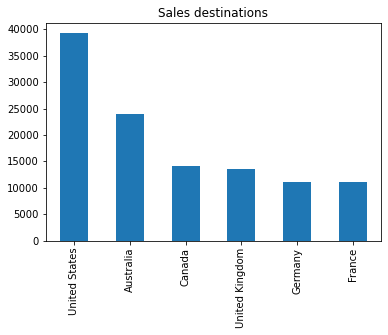

In [309]:
sales["Country"].value_counts().plot(kind= "bar")
plt.title("Sales destinations")
plt.legend

<AxesSubplot:title={'center':'Order_Quantity'}, xlabel='[Country]'>

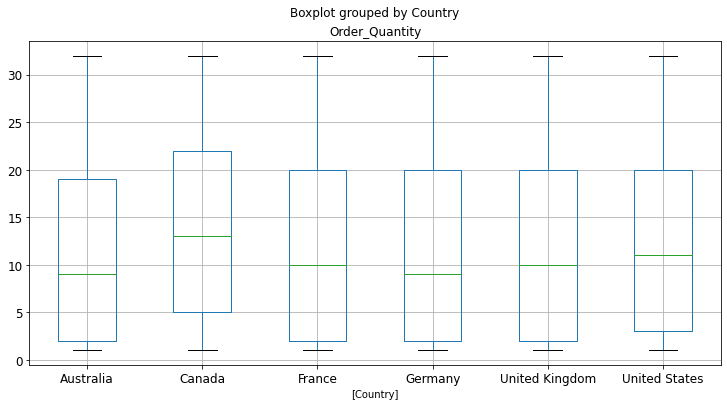

In [700]:
sales[["Country", "Order_Quantity"]].boxplot(by="Country", figsize=(12,6), fontsize=12)

### ANÁLISIS RELACIONADOS CON REVENUE

### CUÁL ES EL INGRESO PROMEDIO POR GRUPO ETARIO?

In [549]:
sales.groupby("Age_Group").Revenue.mean()

Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64

### CUÁL ES EL INGRESO PROMEDIO POR PAÍS?

In [313]:
sales.groupby("Country").Revenue.mean()

Country
Australia         889.959016
Canada            559.721964
France            766.764139
Germany           809.028293
United Kingdom    781.659031
United States     713.552696
Name: Revenue, dtype: float64

In [314]:
sales.groupby("Country").Profit.mean()

Country
Australia         283.089489
Canada            262.187615
France            261.891435
Germany           302.756803
United Kingdom    324.071439
United States     282.447687
Name: Profit, dtype: float64

### CUÁLES SON LAS CATEGORÍAS MÁS VENDIDAS?

In [315]:
sales["Product_Category"].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

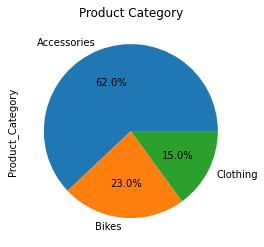

In [316]:
sales["Product_Category"].value_counts().plot(kind="pie", autopct = '%1.1f%%')
plt.title("Product Category")
plt.legend

### CUÁLES SON LAS SUBCATEGORÍAS MÁS VENDIDAS?

In [317]:
sales["Sub_Category"].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

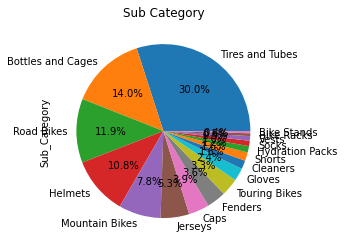

In [318]:
sales["Sub_Category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Sub Category")
plt.legend

### CUÁLES SON LOS PRODUCTOS MÁS VENDIDOS?

In [319]:
sales["Product"].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

### CUÁL ES EL PRODUCTO QUE MÁS GANANCIA GENERA?           *revisar*

In [693]:
mas_ganancia = sales.groupby("Product").Profit.sum().head(10)
mas_ganancia

Product
AWC Logo Cap               78008
All-Purpose Bike Stand    201064
Bike Wash - Dissolver     116008
Classic Vest, L           157319
Classic Vest, M           161740
Classic Vest, S           170581
Fender Set - Mountain     749041
HL Mountain Tire          531672
HL Road Tire              268136
Half-Finger Gloves, L     166721
Name: Profit, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

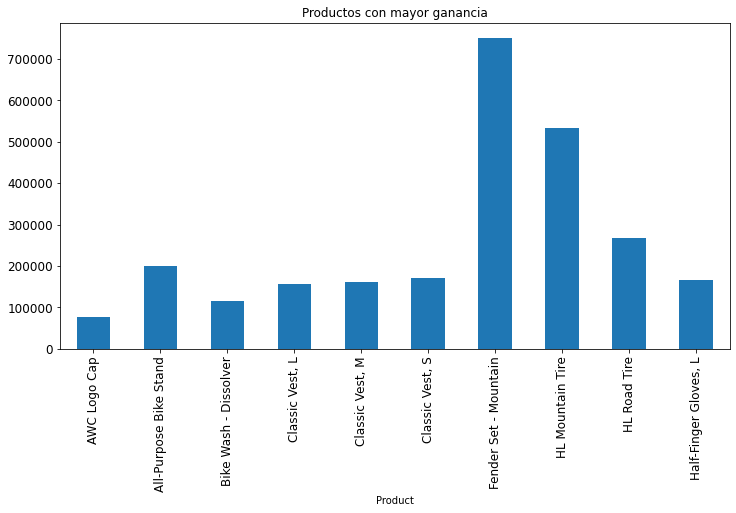

In [689]:
mas_ganancia.plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Productos con mayor ganancia")
plt.legend

### COSTO UNITARIO Y PRECIO UNITARIO

In [324]:
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [325]:
sales["Unit_Cost"].mean()

267.296365759581

'Un gráfico de densidad visualiza la distribución de datos en un intervalo continuo.'

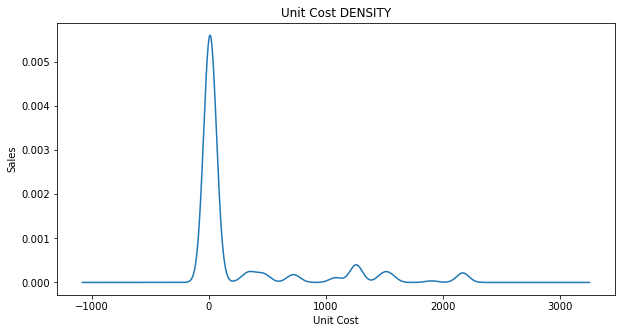

In [326]:
sales["Unit_Cost"].plot(kind="density", fontsize=10, figsize=(10,5))
plt.title("Unit Cost DENSITY")
plt.xlabel("Unit Cost")
plt.ylabel("Sales")

"Un gráfico de densidad visualiza la distribución de datos en un intervalo continuo."

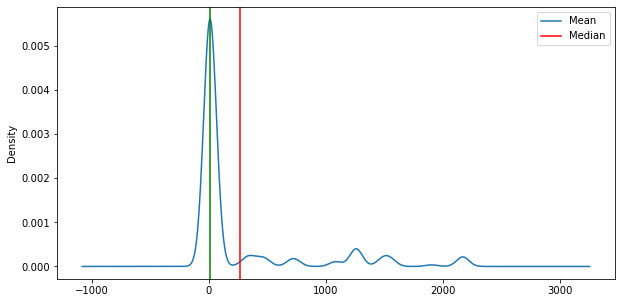

In [327]:
ax = sales["Unit_Cost"].plot(kind="density", figsize=(10,5))
mean = ax.axvline(sales["Unit_Cost"].mean(), color= "Red")
median = ax.axvline(sales["Unit_Cost"].median(), color="Green")
plt.legend({"Mean": mean, "Median": median})

Text(0.5, 1.0, 'Relación entre Costo Unitario y Precio Unitario')

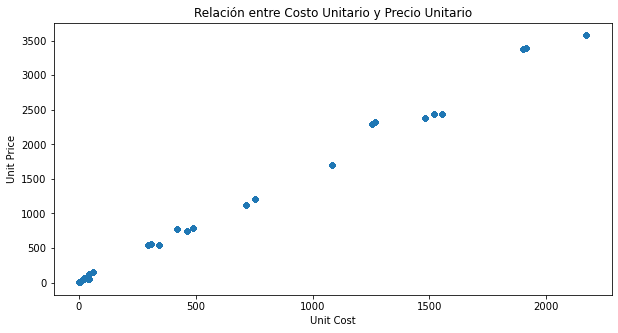

In [328]:
sales.plot(kind="scatter", x = "Unit_Cost", y = "Unit_Price", figsize = (10,5), fontsize=10)
plt.xlabel("Unit Cost")
plt.ylabel("Unit Price")
plt.title("Relación entre Costo Unitario y Precio Unitario")

### CANTIDAD POR PEDIDO Y GANANCIA (ORDER QUANTITY AND PROFIT)

In [330]:
sales["Order_Quantity"].describe()

count    113036.000000
mean         11.901660
std           9.561857
min           1.000000
25%           2.000000
50%          10.000000
75%          20.000000
max          32.000000
Name: Order_Quantity, dtype: float64

Text(0, 0.5, 'Sales')

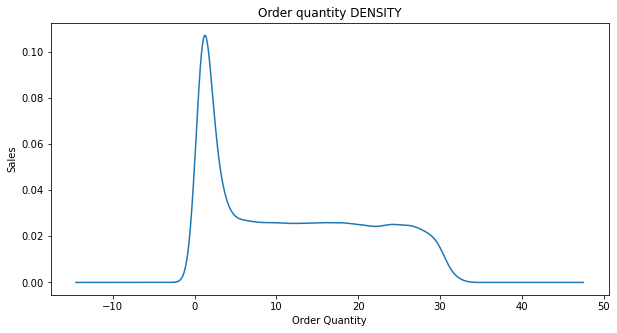

In [331]:
sales["Order_Quantity"].plot(kind = "density", figsize=(10,5), fontsize=10)
plt.title("Order quantity DENSITY")
plt.xlabel("Order Quantity")
plt.ylabel("Sales")

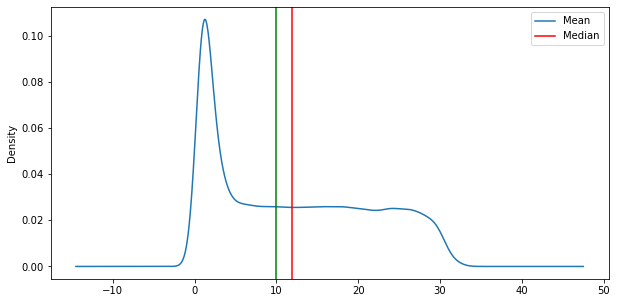

In [332]:
ax = sales["Order_Quantity"].plot(kind = "density", figsize=(10,5))
mean = ax.axvline(sales["Order_Quantity"].mean(), color="r")
median = ax.axvline(sales["Order_Quantity"].median(), color="g")
plt.legend({"Mean": mean, "Median": median})

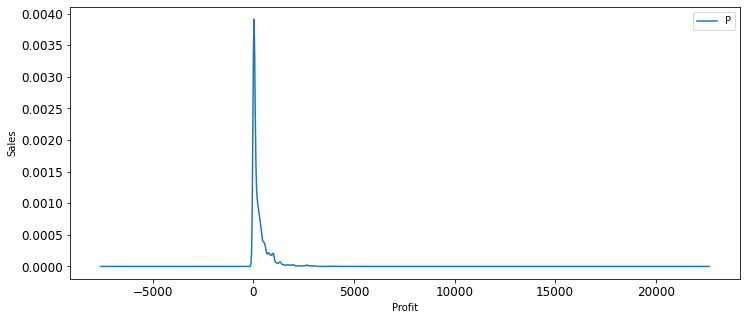

In [333]:
sales["Profit"].plot(kind="density", figsize=(12,5), fontsize=12)
plt.ylabel("Sales")
plt.xlabel("Profit")
plt.legend("Profit DENSITY")

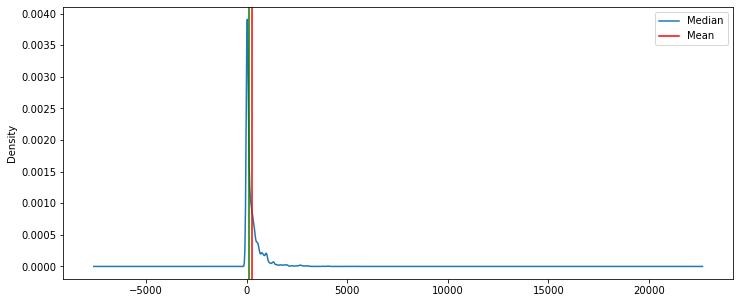

In [334]:
ax = sales["Profit"].plot(kind="density", figsize=(12,5))
mean = ax.axvline(sales["Profit"].mean(), color="r")
median = ax.axvline(sales["Profit"].median(), color="g")
plt.legend({"Median":median, "Mean":mean})

<function matplotlib.pyplot.legend(*args, **kwargs)>

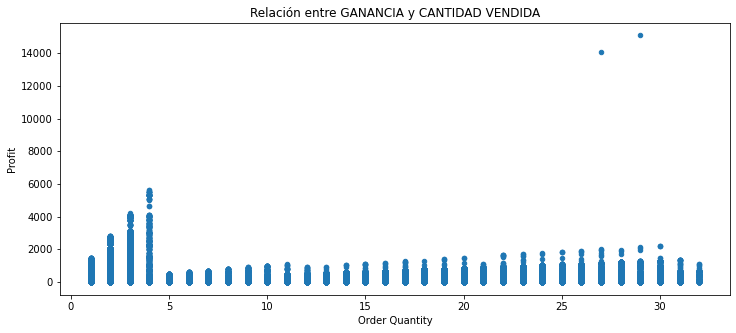

In [675]:
sales.plot(kind="scatter", x="Order_Quantity", y="Profit", figsize=(12,5), fontsize=10)
plt.title("Relación entre GANANCIA y CANTIDAD VENDIDA")
plt.xlabel("Order Quantity")
plt.ylabel("Profit")
plt.legend

### EVOLUCIÓN DE LAS VENTAS

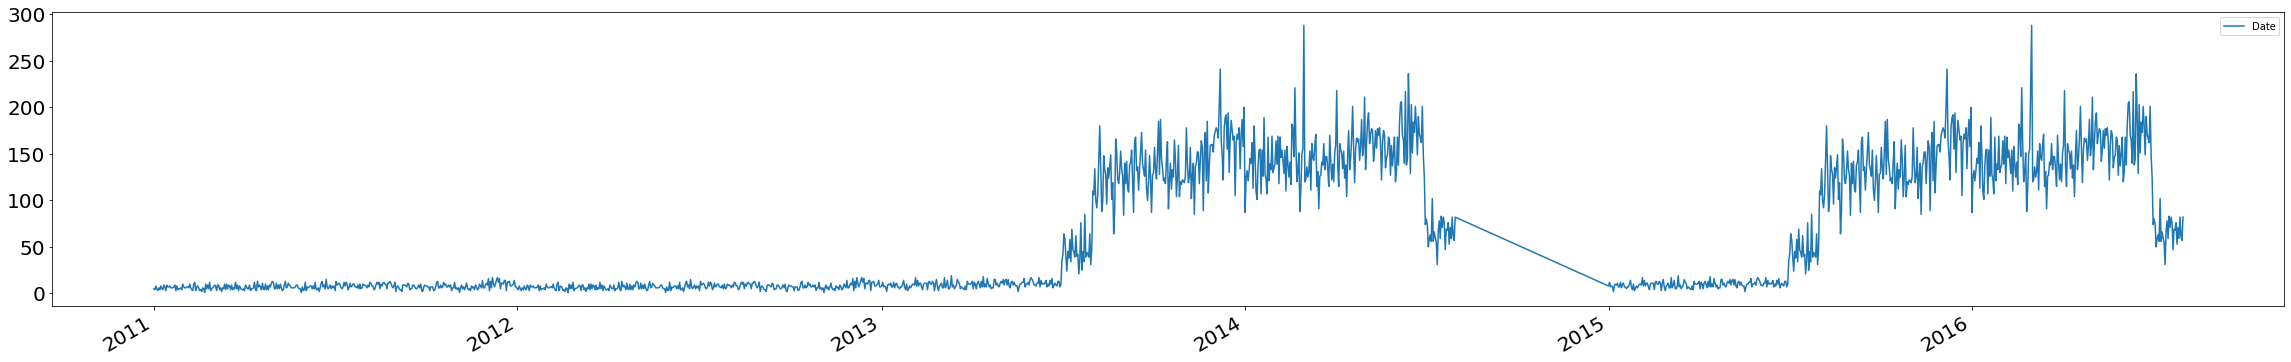

In [341]:
sales["Date"].value_counts().plot(kind="line", figsize=(40,6), fontsize=20)
plt.legend()

### CUÁLES SON LOS PRODUCTOS MÁS VENDIDOS?

In [694]:
sales.loc[:,"Product"].value_counts().head(10)

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: Product, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

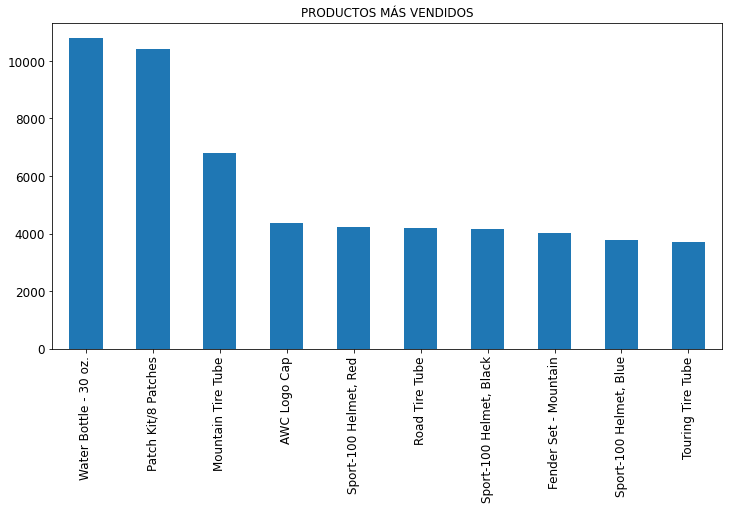

In [695]:
sales.loc[:,"Product"].value_counts().head(10).plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("PRODUCTOS MÁS VENDIDOS")
plt.legend

### DISTRIBUCIÓN DE CANTIDAD VENDIDA

<function matplotlib.pyplot.legend(*args, **kwargs)>

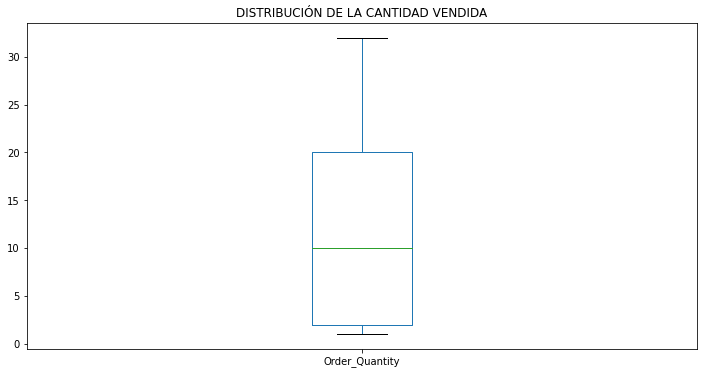

In [699]:
sales["Order_Quantity"].plot(kind="box", figsize=(12,6))
plt.title("DISTRIBUCIÓN DE LA CANTIDAD VENDIDA")
plt.legend

# ANÁLISIS DE  COMPRAS DE PRODUCTO ÚNICO

In [397]:
one_order = sales[sales["Order_Quantity"]==1]
one_order = one_order.sort_values(["Date"], ascending=True)
one_order

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
65741,2011-01-02,2,January,2011,35,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,385,713,1098
69063,2011-01-02,2,January,2011,32,Young Adults (25-34),M,United Kingdom,England,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,362,713,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27719,2016-07-30,30,July,2016,40,Adults (35-64),M,United States,Washington,Clothing,Gloves,"Half-Finger Gloves, S",1,9,24,10,9,19
90048,2016-07-30,30,July,2016,65,Seniors (64+),M,Australia,Victoria,Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2
96983,2016-07-31,31,July,2016,21,Youth (<25),F,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,1,2,5,2,2,4
87199,2016-07-31,31,July,2016,17,Youth (<25),M,Canada,British Columbia,Accessories,Tires and Tubes,Mountain Tire Tube,1,2,5,3,2,5


In [400]:
one_order["Profit"].describe()

count    22626.000000
mean       469.510254
std        375.046464
min         -1.000000
25%        158.000000
50%        385.000000
75%        768.000000
max       1454.000000
Name: Profit, dtype: float64

In [401]:
one_order["Revenue"].describe()

count    22626.000000
mean      1396.715327
std       1024.959365
min          2.000000
25%        518.000000
50%       1395.000000
75%       2227.000000
max       3542.000000
Name: Revenue, dtype: float64

### CUÁL ES EL PRINCIPAL DESTINO DE VENTAS DE 1 SOLO PRODUCTO?

<function matplotlib.pyplot.legend(*args, **kwargs)>

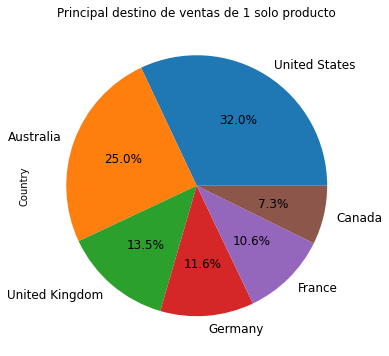

In [402]:
one_order["Country"].value_counts().plot(kind="pie", figsize = (12,6), fontsize=12, autopct = "%1.1f%%")
plt.title("Principal destino de ventas de 1 solo producto")
plt.legend

### CUÁL ES LA CATEGORÍA DE PRODUCTO VENDIDO?

<function matplotlib.pyplot.legend(*args, **kwargs)>

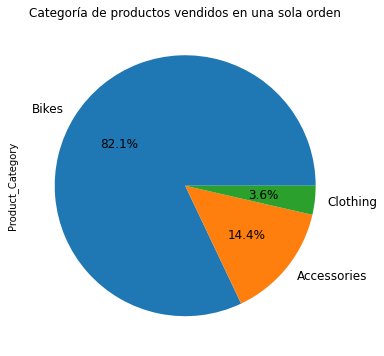

In [404]:
one_order["Product_Category"].value_counts().plot(kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Categoría de productos vendidos en una sola orden")
plt.legend

### CUÁL ES LA SUBCATEGORÍA DE PRODUCTO VENDIDO?

<function matplotlib.pyplot.legend(*args, **kwargs)>

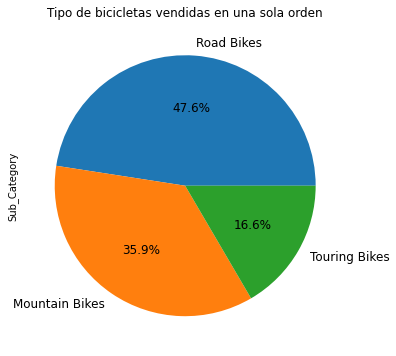

In [406]:
one_order.loc[one_order["Product_Category"]=="Bikes", "Sub_Category"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Tipo de bicicletas vendidas en una sola orden")
plt.legend

### CUÁLES SON LOS MODELOS DE ROAD BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

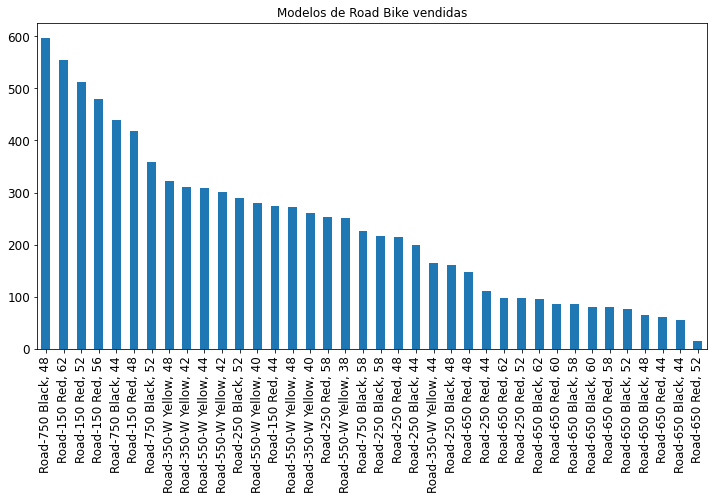

In [421]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Road Bike vendidas")
plt.legend

### CUÁLES SON LOS MODELOS DE MOUNTAIN BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

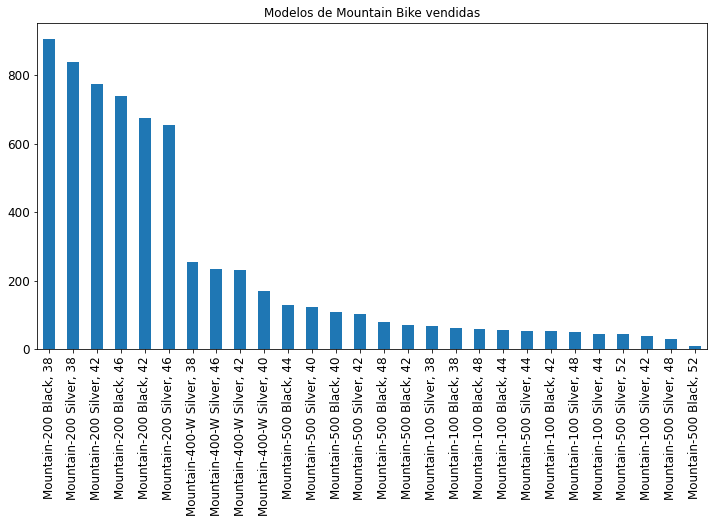

In [420]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Mountain Bike vendidas")
plt.legend

### CUÁLES SON LOS MODELOS DE TOURING BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

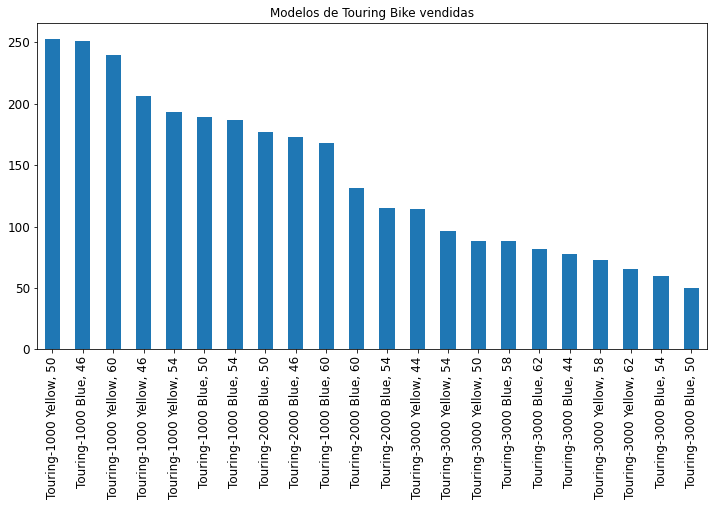

In [419]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Touring Bike vendidas")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON ROAD BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

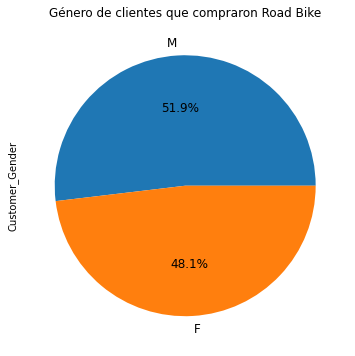

In [427]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Road Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON ROAD BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

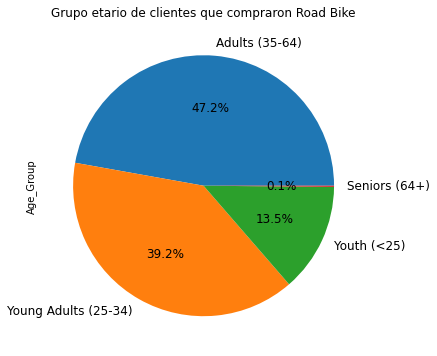

In [429]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Road Bike")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON MOUNTAIN BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

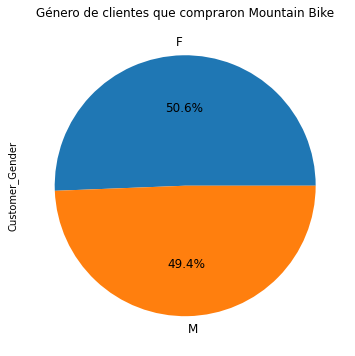

In [430]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Mountain Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON MOUNTAIN BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

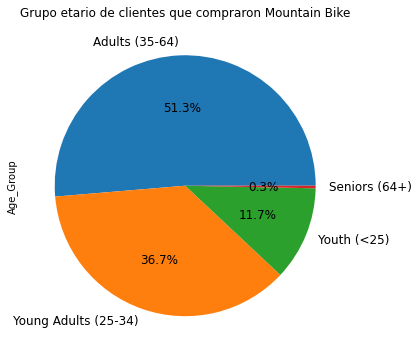

In [431]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Mountain Bike")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON TOURING BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

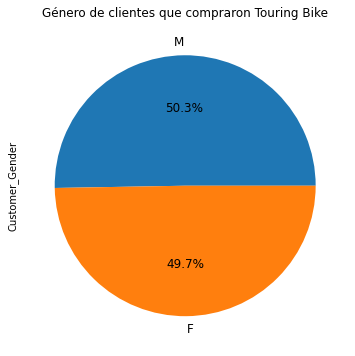

In [433]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Touring Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON TOURING BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

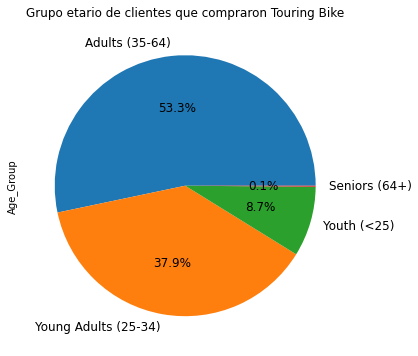

In [582]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Touring Bike")
plt.legend

In [537]:
one_order.groupby(["Age_Group", "Sub_Category", "Customer_Gender"]).count()

Date  Day  Month  Year  \
Age_Group      Sub_Category      Customer_Gender                           
Adults (35-64) Bike Racks        F                  15   15     15    15   
                                 M                  16   16     16    16   
               Bike Stands       F                  21   21     21    21   
                                 M                  13   13     13    13   
               Bottles and Cages F                 173  173    173   173   
...                                                ...  ...    ...   ...   
Youth (<25)    Tires and Tubes   M                 161  161    161   161   
               Touring Bikes     F                 115  115    115   115   
                                 M                 152  152    152   152   
               Vests             F                   5    5      5     5   
                                 M                   2    2      2     2   

                                                  Customer_Age  Country  \
Age_Group      Sub_Category      Customer_Gender                          
Adults (35-64) Bike Racks        F                          15       15   
                                 M                          16       16   
               Bike Stands       F                          21       21   
                                 M                          13       13   
               Bottles and Cages F                         173      173   
...                                                        ...      ...   
Youth (<25)    Tires and Tubes   M                         161      161   
               Touring Bikes     F                         115      115   
                                 M                         152      152   
               Vests             F                           5        5   
                                 M                           2        2   

                                                  State  Product_Category  \
Age_Group      Sub_Category      Customer_Gender                            
Adults (35-64) Bike Racks        F                   15                15   
                                 M                   16                16   
               Bike Stands       F                   21                21   
                                 M                   13                13   
               Bottles and Cages F                  173               173   
...                                                 ...               ...   
Youth (<25)    Tires and Tubes   M                  161               161   
               Touring Bikes     F                  115               115   
                                 M                  152               152   
               Vests             F                    5                 5   
                                 M                    2                 2   

                                                  Product  Order_Quantity  \
Age_Group      Sub_Category      Customer_Gender                            
Adults (35-64) Bike Racks        F                     15              15   
                                 M                     16              16   
               Bike Stands       F                     21              21   
                                 M                     13              13   
               Bottles and Cages F                    173             173   
...                                                   ...             ...   
Youth (<25)    Tires and Tubes   M                    161             161   
               Touring Bikes     F                    115             115   
                                 M                    152             152   
               Vests             F                      5               5   
                                 M                      2               2   

                                                  Unit_Cost  Unit_Price  \
Age_Gr

In [599]:
touring_bikes_women = one_order.loc[(one_order["Customer_Gender"]=="F") & 
              (one_order["Age_Group"]) & 
              (one_order["Sub_Category"]=="Touring Bikes")]
touring_bikes_women

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
110454,2013-07-01,1,July,2013,36,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-2000 Blue, 60",1,755,1215,436,755,1191
111108,2013-07-01,1,July,2013,30,Young Adults (25-34),F,Germany,Nordrhein-Westfalen,Bikes,Touring Bikes,"Touring-1000 Yellow, 60",1,1482,2384,592,1482,2074
111370,2013-07-01,1,July,2013,19,Youth (<25),F,Australia,New South Wales,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,592,1482,2074
111140,2013-07-02,2,July,2013,18,Youth (<25),F,Germany,Hamburg,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755,1215,375,755,1130
110456,2013-07-03,3,July,2013,36,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-2000 Blue, 60",1,755,1215,436,755,1191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109201,2016-06-29,29,June,2016,51,Adults (35-64),F,Germany,Saarland,Bikes,Touring Bikes,"Touring-3000 Yellow, 54",1,461,742,147,461,608
108751,2016-06-29,29,June,2016,46,Adults (35-64),F,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Blue, 44",1,461,742,185,461,646
109665,2016-06-30,30,June,2016,44,Adults (35-64),F,Germany,Bayern,Bikes,Touring Bikes,"Touring-1000 Yellow, 50",1,1482,2384,878,1482,2360
110349,2016-06-30,30,June,2016,39,Adults (35-64),F,Canada,Alberta,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,902,1482,2384


<function matplotlib.pyplot.legend(*args, **kwargs)>

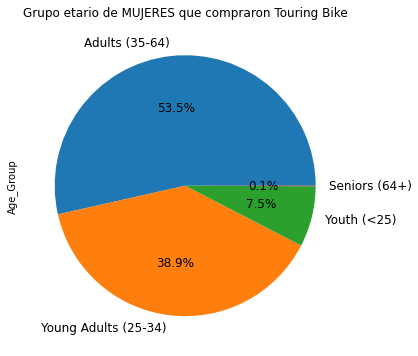

In [600]:
touring_bikes_women["Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de MUJERES que compraron Touring Bike")
plt.legend

#                              ANÁLISIS DE VENTAS EN USA

In [605]:
usa_sales = sales[sales["Country"]=="United States"]
usa_sales = usa_sales.sort_values(["Date"], ascending=True)
usa_sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
65741,2011-01-02,2,January,2011,35,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,385,713,1098
70757,2011-01-03,3,January,2011,39,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026
57953,2011-01-03,3,January,2011,29,Young Adults (25-34),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42917,2016-07-31,31,July,2016,39,Adults (35-64),M,United States,California,Accessories,Hydration Packs,Hydration Pack - 70 oz.,7,21,55,230,147,377
10669,2016-07-31,31,July,2016,39,Adults (35-64),M,United States,California,Accessories,Bottles and Cages,Mountain Bottle Cage,19,4,10,110,76,186
83523,2016-07-31,31,July,2016,55,Adults (35-64),F,United States,California,Accessories,Tires and Tubes,Mountain Tire Tube,23,2,5,67,46,113
14575,2016-07-31,31,July,2016,38,Adults (35-64),M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,18,2,5,52,36,88


### CANTIDAD DE VENTAS POR ESTADO

In [615]:
usa_sales["State"].value_counts()

California        22450
Washington        11264
Oregon             5286
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
South Carolina       10
Utah                 10
Kentucky             10
Georgia               8
Wyoming               8
Montana               6
Minnesota             6
Missouri              6
North Carolina        4
Virginia              4
Alabama               4
Arizona               4
Mississippi           4
Massachusetts         2
Name: State, dtype: int64

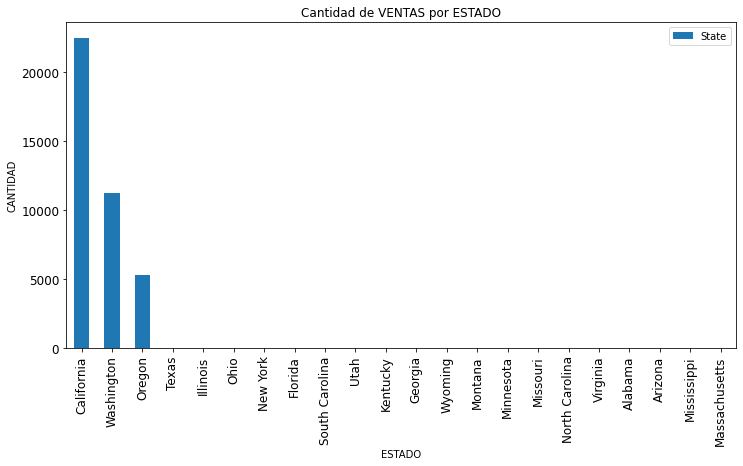

In [621]:
usa_sales["State"].value_counts().plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Cantidad de VENTAS por ESTADO")
plt.xlabel("ESTADO")
plt.ylabel("CANTIDAD")
plt.legend()

### INGRESOS POR ESTADO

In [647]:
state_revenue = usa_sales.groupby(usa_sales["State"]).sum()["Revenue"]
state_revenue = state_revenue.sort_values(ascending = False)
state_revenue.head(5)

State
California    17672620
Washington     6741510
Oregon         3450410
Wyoming          21973
Illinois         20141
Name: Revenue, dtype: int64

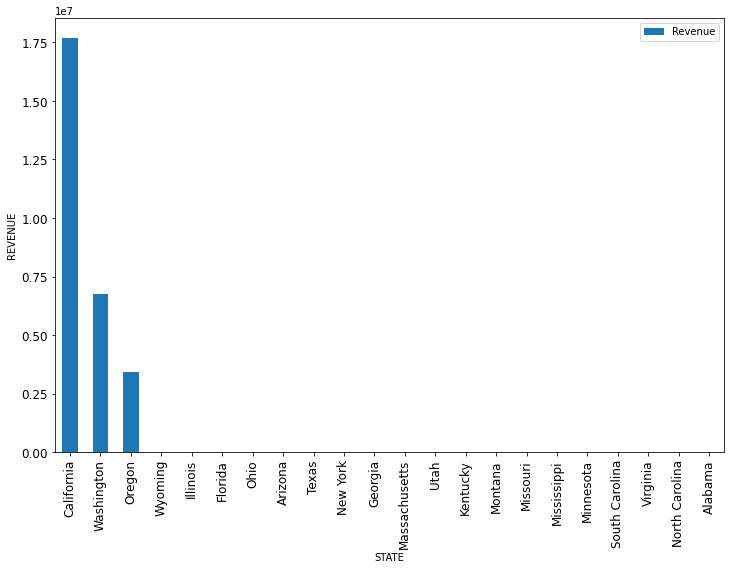

In [650]:
state_revenue.plot(kind="bar", figsize=(12,8), fontsize=12)
plt.xlabel("STATE")
plt.ylabel("REVENUE")
plt.legend()

### CUÁNTAS VENTAS POR SUB CATEGORÍA

In [616]:
usa_sales["Sub_Category"].value_counts()

Tires and Tubes      11742
Bottles and Cages     5844
Helmets               4036
Road Bikes            3842
Mountain Bikes        3048
Jerseys               2048
Fenders               1840
Caps                  1346
Touring Bikes         1138
Gloves                 992
Shorts                 910
Cleaners               704
Hydration Packs        478
Socks                  468
Vests                  372
Bike Racks             242
Bike Stands            156
Name: Sub_Category, dtype: int64

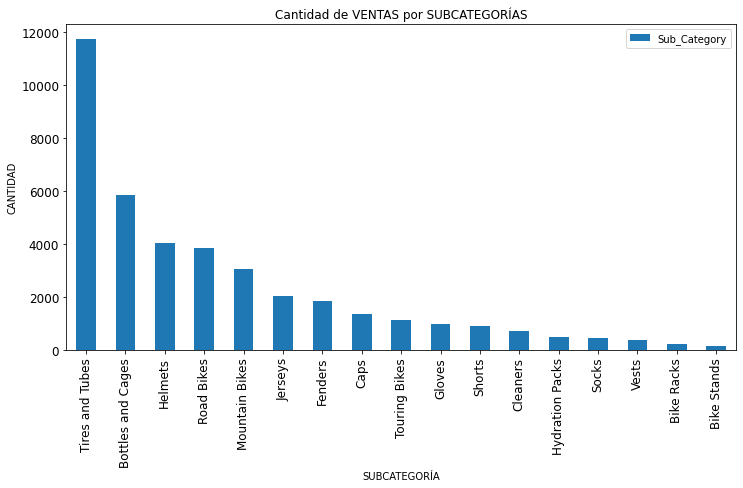

In [609]:
usa_sales["Sub_Category"].value_counts().plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Cantidad de VENTAS por SUBCATEGORÍAS")
plt.xlabel("SUBCATEGORÍA")
plt.ylabel("CANTIDAD")
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

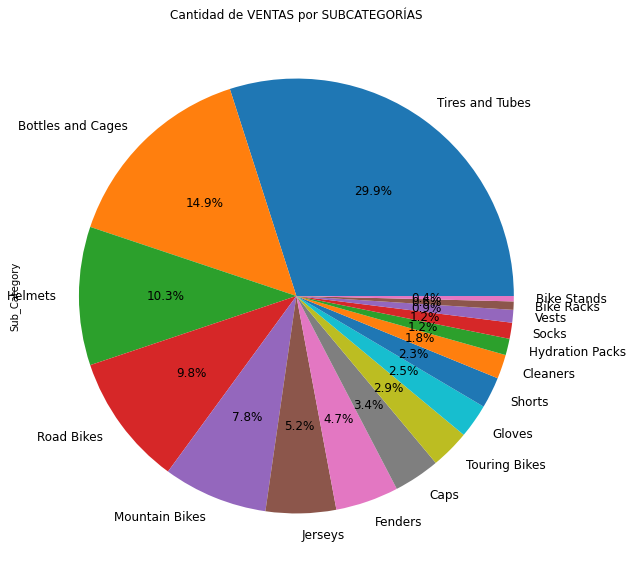

In [614]:
usa_sales["Sub_Category"].value_counts().plot(kind="pie", figsize=(30,10), fontsize=12, autopct="%1.1f%%")
plt.title("Cantidad de VENTAS por SUBCATEGORÍAS")
plt.legend

### CUÁL ES LA CANTIDAD DE "TIRES AND TUBES" VENDIDA EN CALIFORNIA?

In [732]:
usa_sales.loc[(sales["State"]=="California") & (sales["Sub_Category"]=="Tires and Tubes")].shape[0]

6472

### CUÁL ES LA GANANCIA TOTAL DE ESTADO DE OREGON? 

In [733]:
usa_sales.groupby(sales["State"]=="Oregon").Profit.sum()

State
False    9815476
True     1258168
Name: Profit, dtype: int64

### CUÁNTAS MOUNTAIN BIKE SE VENDIERON EN ESTADO DE WASHINGTON?

In [734]:
usa_sales.loc[(sales["State"]=="Washington") & (sales["Sub_Category"]=="Road Bikes")].shape[0]

1076

### *TOP 5* PRODUCTOS MÁS VENDIDOS EN CALIFORNIA, WASHINGTON Y OREGON

### CALIFORNIA

In [656]:
california_sales = usa_sales.loc[usa_sales["State"]=="California", "Product"].value_counts().head(5)
california_sales

Water Bottle - 30 oz.      2392
Patch Kit/8 Patches        1830
Mountain Tire Tube         1512
Fender Set - Mountain      1052
Sport-100 Helmet, Black     826
Name: Product, dtype: int64

### WASHINGTON

In [657]:
washington_sales = usa_sales.loc[usa_sales["State"]=="Washington", "Product"].value_counts().head(5)
washington_sales

Patch Kit/8 Patches        1262
Mountain Tire Tube         1108
Water Bottle - 30 oz.      1086
Sport-100 Helmet, Black     560
Fender Set - Mountain       520
Name: Product, dtype: int64

### OREGON

In [658]:
oregon_sales = usa_sales.loc[usa_sales["State"]=="Oregon", "Product"].value_counts().head(5)
oregon_sales

Patch Kit/8 Patches      552
Water Bottle - 30 oz.    536
Mountain Tire Tube       314
Road Tire Tube           272
Fender Set - Mountain    262
Name: Product, dtype: int64

### DISTRIBUCIÓN DE EDADES DE CLIENTES EN LOS ESTADOS

<function matplotlib.pyplot.legend(*args, **kwargs)>

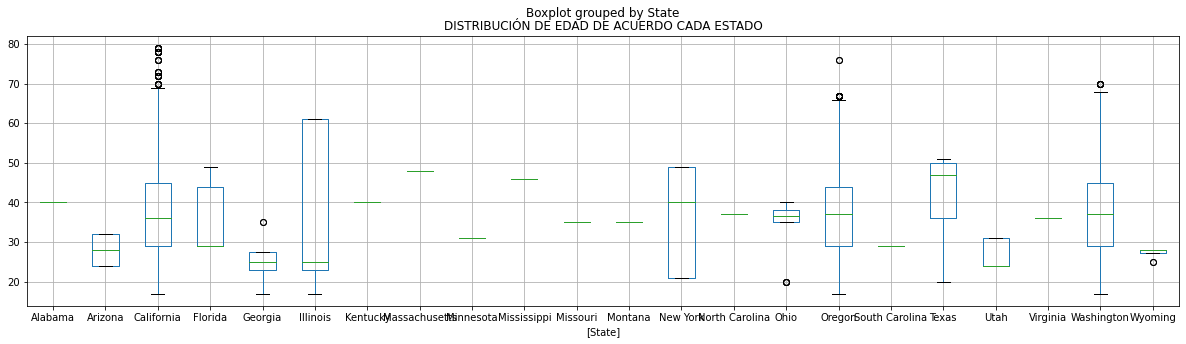

In [735]:
usa_sales[["State", "Customer_Age"]].boxplot(by="State", figsize=(20,5))
plt.title("DISTRIBUCIÓN DE EDAD DE ACUERDO CADA ESTADO")
plt.legend

### CUÁLES SON LAS 5 VENTAS CON MAYOR INGRESO?

In [744]:
top5_revenue = usa_sales.sort_values(["Revenue"], ascending=False).head(5)
top5_revenue

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
58359,2011-03-27,27,March,2011,24,Youth (<25),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,8684,14026
70507,2011-08-19,19,August,2011,49,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026
71479,2011-01-17,17,January,2011,44,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,8684,14026
71269,2011-01-17,17,January,2011,30,Young Adults (25-34),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026
58817,2011-04-29,29,April,2011,28,Young Adults (25-34),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,8684,14026


### CUÁLES FUERON LOS PRODUCTOS VENDIDOS?

In [745]:
top5_revenue["Product"]

58359    Road-150 Red, 44
70507    Road-150 Red, 48
71479    Road-150 Red, 62
71269    Road-150 Red, 48
58817    Road-150 Red, 62
Name: Product, dtype: object

In [753]:
usa_sales.loc[usa_sales["Revenue"]>12000,"Order_Quantity"].sum()

88